In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


In [4]:
# Loading dataset from csv file
raw_mail_data = pd.read_csv('mail_data.csv')

In [6]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [9]:
data.head(7)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.shape

(5572, 2)

In [12]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

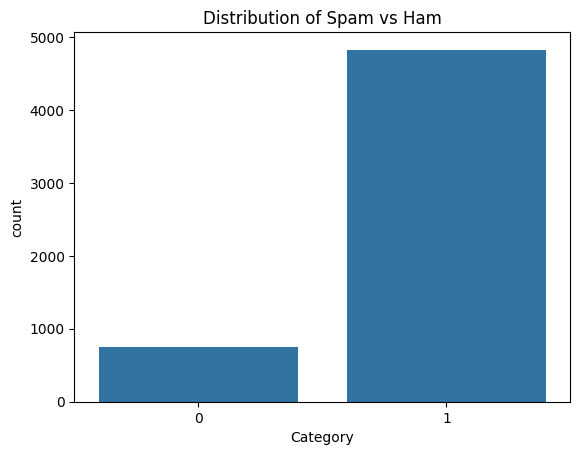

In [35]:
# Count of spam vs ham
sns.countplot(x='Category', data=data)
plt.title("Distribution of Spam vs Ham")
plt.show()


In [13]:
X=data['Message']
Y=data['Category']

In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [16]:
# splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [19]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [20]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [21]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [22]:
# training Model
model = LogisticRegression()


In [23]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [24]:
pred_on_trainning_data = model.predict(X_train_features)
accur_on_training_data = accuracy_score(Y_train, pred_on_trainning_data)

In [25]:
print('Accuracy on training data : ', accur_on_training_data)

Accuracy on training data :  0.9676912721561588


In [26]:
pred_on_test_data = model.predict(X_test_features)
accur_on_test_data = accuracy_score(Y_test, pred_on_test_data)

In [27]:
print('Accuracy on test data : ', accur_on_test_data)

Accuracy on test data :  0.9668161434977578


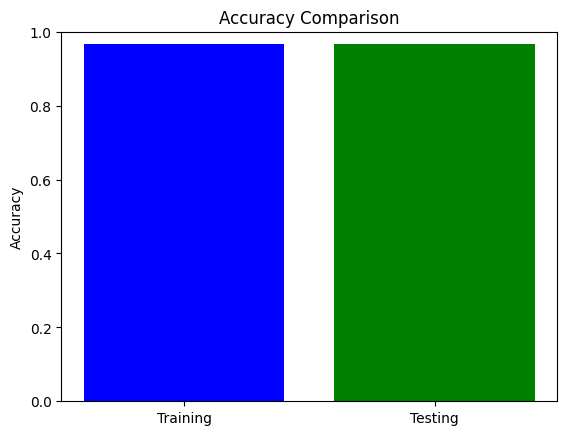

In [33]:
scores = [accur_on_training_data, accur_on_test_data]
labels = ['Training', 'Testing']

plt.bar(labels, scores, color=['blue','green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


In [32]:
input_your_mail = ["Congratulations! You have won $10,000 cash prize Click here to claim your reward immediately: http://fakeurl.com/win  Hurry up, this offer expires soon!"]
input_data = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data)
print(prediction)


[0]
